In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest

#### 1. Cargad el csv de listings

In [56]:
df = pd.read_csv('listings.csv', index_col= 0)
df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
12153,41418938,Hostal Armesto - Matrimonial. Baño privado. In...,325540285,Emilio,Centro,Cortes,40.41406,-3.69797,Private room,47,1,60,2021-10-26,2.6,3,334,36,NaN


#### 2. Eliminad las columnas latitude, longitude, last_review, license, name, host_id, neighbourhood, id y host_name ya que no serán útiles para nuestro propósito.

In [57]:
df = df.drop(['latitude', 'longitude', 'last_review', 'license', 'name', 'host_id', 'neighbourhood', 'id', 'host_name'], axis=1)

In [58]:
df.sample(15)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11121,Ciudad Lineal,Private room,49,2,3,0.11,1,37,0
7653,Centro,Entire home/apt,69,3,80,2.17,2,55,8
4269,Centro,Entire home/apt,140,2,55,1.06,7,63,12
13628,Centro,Private room,36,2,2,0.14,14,72,1
8337,Centro,Entire home/apt,84,1,76,2.27,9,95,0
4066,San Blas - Canillejas,Private room,31,1,27,0.49,2,253,0
6810,Moncloa - Aravaca,Private room,35,1,5,0.12,2,0,0
10133,Carabanchel,Private room,16,10,3,0.10,4,162,1
5553,Centro,Entire home/apt,91,1,91,1.93,4,345,9
15932,Centro,Private room,20,30,0,NaN,2,343,0


#### 3. Explorad el dataset, para esto tendréis que usar métodos aprendidos hasta ahora, como el describe(), el info(), value_counts(), etc. También podréis hacer gráficas para empaparos mejor del dataset.
📌 NOTA En caso de que haya algún nulo gestionad esos valores como aprendimos en las lecciones de limpieza.

In [59]:
df.describe(include='all')

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17606,17606,17606.000000,17606.000000,17606.000000,13593.000000,17606.000000,17606.000000,17606.000000
unique,21,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Centro,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8048,10688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,106.527150,7.449279,36.328184,1.347131,11.622856,148.076622,6.598035
std,NaN,NaN,130.223339,36.375985,68.979754,1.574951,27.842846,139.668538,13.367240
min,NaN,NaN,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,NaN,NaN,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000,0.000000
50%,NaN,NaN,71.000000,2.000000,7.000000,0.810000,2.000000,104.000000,1.000000
75%,NaN,NaN,114.000000,3.000000,38.000000,1.940000,7.000000,308.000000,7.000000


<font color= 'pink'> ¿Cómo son nuestras columnas?

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17606 entries, 0 to 17830
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             17606 non-null  object 
 1   room_type                       17606 non-null  object 
 2   price                           17606 non-null  int64  
 3   minimum_nights                  17606 non-null  int64  
 4   number_of_reviews               17606 non-null  int64  
 5   reviews_per_month               13593 non-null  float64
 6   calculated_host_listings_count  17606 non-null  int64  
 7   availability_365                17606 non-null  int64  
 8   number_of_reviews_ltm           17606 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


In [61]:
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [62]:
df['neighbourhood_group'].value_counts()

Centro                   8048
Salamanca                1207
Chamberí                 1053
Arganzuela                972
Tetuán                    755
Carabanchel               610
Retiro                    607
Ciudad Lineal             523
Chamartín                 505
Moncloa - Aravaca         499
Latina                    482
Puente de Vallecas        477
San Blas - Canillejas     419
Hortaleza                 350
Fuencarral - El Pardo     271
Usera                     257
Villaverde                165
Barajas                   137
Moratalaz                 118
Villa de Vallecas          79
Vicálvaro                  72
Name: neighbourhood_group, dtype: int64

<font color='pink'> Vamos a ver cuántos nulos tenemos!

In [63]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

neighbourhood_group                0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 22.793366
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [64]:
df.isnull().sum()

neighbourhood_group                  0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4013
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<font color='pink'> Reemplazar los nulos por media o moda.

In [83]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [84]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [85]:
df.sample()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6528,Centro,Private room,35,1,1,0.02,4,0,0


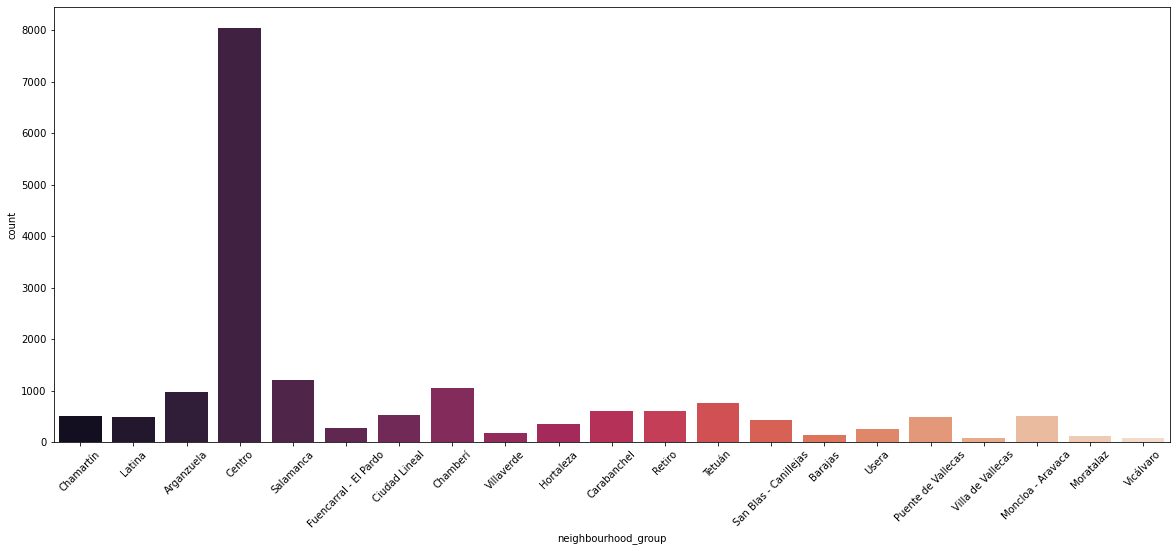

In [65]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="neighbourhood_group", data=df, palette="rocket");

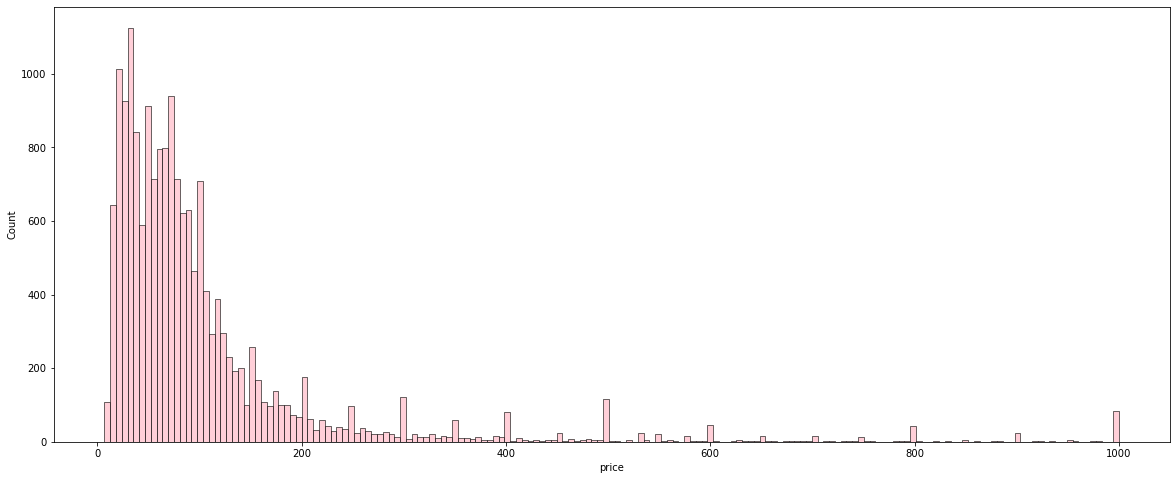

In [66]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="price", color = 'pink');

#### 4. Definid cuáles son las variables predictoras y la variable respuesta. Debéis tener en cuenta que lo que vamos a querer saber es de que depende el precio de las casas.

 -  variable respuesta = price = y
 -  variable predictora = room type, neighbourhood group

#### 5. Plantead una hipótesis alternativa. ¿Qué variables creeis que afectarán al precio de una casa?

<font color ='pink'>
- H0 = el precio NO depende del barrio


<font color = 'pink'> 
- H1 = el precio DEPENDE del barrio

<font color = 'pink'>  - - - - - - - - - - - - - - - - - - -

<font color='pink'> 
- H0 = el precio NO depende del tipo de habitaciones




<font color='pink'>- H1 = el precio DEPENDE del tipo de habitaciones

#### 6. Evaluad la normalidad de la variable respuesta. Hacedlo visualmente usando un histplot o un displot

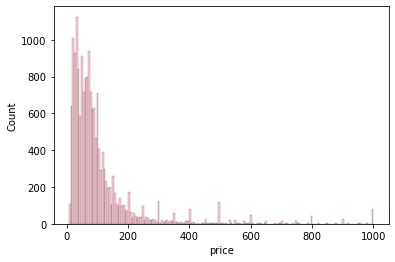

In [72]:
sns.histplot(df['price'], color = "pink", );

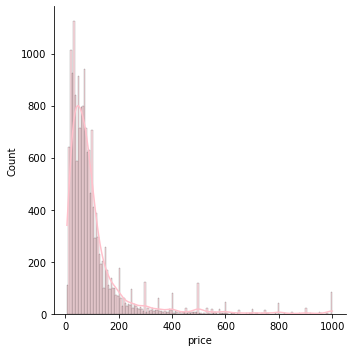

In [67]:
sns.displot(df['price'], kde = True, color = "pink", );

<font color='pink'> Nuestras hipótesis alternativas son H1. Concluimos que las variables que van a afectar al precio de una casa son `neigthbourhood_group` y `room_type`. 
Nuestra variable 'price' no tiene una distribución normal. Está sesgada hacia la izquierda.

#### 7. Evaluad la curtosis de las variables del dataset. ¿Qué tipo presenta cada variable?

In [76]:
df_num = df.select_dtypes(include = 'number')
df_num.head(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,59,1,81,0.57,1,149,3
1,31,4,33,0.38,2,131,0


In [82]:
for col in df_num.columns:
    print(f'La curtosidad de {col} es', kurtosistest(df_num[col]))

La curtosidad de price es KurtosistestResult(statistic=64.47166433148656, pvalue=0.0)
La curtosidad de minimum_nights es KurtosistestResult(statistic=92.63520739410924, pvalue=0.0)
La curtosidad de number_of_reviews es KurtosistestResult(statistic=61.516969011224326, pvalue=0.0)
La curtosidad de reviews_per_month es KurtosistestResult(statistic=nan, pvalue=nan)
La curtosidad de calculated_host_listings_count es KurtosistestResult(statistic=67.38410593803559, pvalue=0.0)
La curtosidad de availability_365 es KurtosistestResult(statistic=324.0690603833309, pvalue=0.0)
La curtosidad de number_of_reviews_ltm es KurtosistestResult(statistic=74.82995262621837, pvalue=0.0)


<font color='pink'> En el resultado anterior podemos ver que todas las columnas, menos en una, tienen una curtosidad mayor que 0, por lo que nuestros datos son de tipo leptocúrtico. La columna `reviews_per_month` nos sale valor NaN.

#### 8. Como hemos eliminado algunas columnas, guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair programming.

In [ ]:
df.to_csv("listings_pair_1.csv")